<a href="https://colab.research.google.com/github/SrilekhaRani/ML_Projects/blob/main/Recognition_of_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [4]:
import keras

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [6]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [7]:
print(y_train[0])

[6]


In [8]:
print(x_train[0].shape)

(32, 32, 3)


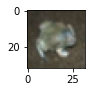

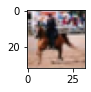

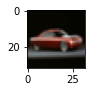

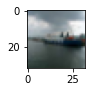

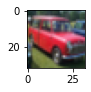

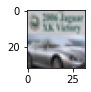

In [9]:
for i in range(132, 138):
  plt.subplot(120+i+1)
  img = x_train[i]
  plt.imshow(img)
  plt.show()

In [10]:
x_train = x_train.reshape(x_train.shape[0], 32, 32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test = x_test/255
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape before one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape before one-hot encoding:  (50000, 10)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(50, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
model.fit(x_train, Y_train, batch_size=128, epochs=10,validation_data=(x_test, Y_test))

Epoch 1/10
391/391 [==============================] - 489s 1s/step - loss: 1.5830 - accuracy: 0.4130 - val_loss: 1.1966 - val_accuracy: 0.5664
Epoch 2/10
391/391 [==============================] - 479s 1s/step - loss: 1.1218 - accuracy: 0.6001 - val_loss: 0.9447 - val_accuracy: 0.6647
Epoch 3/10
391/391 [==============================] - 472s 1s/step - loss: 0.9169 - accuracy: 0.6789 - val_loss: 0.7948 - val_accuracy: 0.7246
Epoch 4/10
391/391 [==============================] - 465s 1s/step - loss: 0.8005 - accuracy: 0.7195 - val_loss: 0.7617 - val_accuracy: 0.7371
Epoch 5/10
391/391 [==============================] - 457s 1s/step - loss: 0.7159 - accuracy: 0.7497 - val_loss: 0.7114 - val_accuracy: 0.7559
Epoch 6/10
391/391 [==============================] - 453s 1s/step - loss: 0.6441 - accuracy: 0.7751 - val_loss: 0.6897 - val_accuracy: 0.7622
Epoch 7/10
391/391 [==============================] - 451s 1s/step - loss: 0.5882 - accuracy: 0.7936 - val_loss: 0.6858 - val_accuracy: 0.7684

In [14]:
classes = range(0, 10)

names = ['airplane',
      'automobile',
      'bird',
      'cat',
      'deer',
      'dog',
      'frog',
      'horse',
      'ship',
      'truck']

#zip the names
class_labels = dict(zip(classes, names))

# Generate Batch of 9 images to predict
batch = x_test[100:109]
labels = np.argmax(Y_test[100:109], axis=1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 112ms/step


In [15]:
print(predictions)

[[4.7728111e-04 1.1388107e-04 1.8769151e-02 7.5512342e-02 1.9879755e-01
  1.4115191e-01 1.1305332e-03 5.6310368e-01 3.8649741e-04 5.5723870e-04]
 [1.0127327e-04 1.4335782e-05 1.2288620e-01 1.8137440e-01 2.5575107e-02
  5.6931245e-01 7.7710189e-02 2.2713140e-02 2.0924218e-04 1.0368053e-04]
 [2.3664914e-03 3.2810611e-03 3.5507884e-02 1.4459576e-01 8.2167340e-03
  2.1794604e-02 7.5589591e-01 2.4378285e-02 1.6853694e-03 2.2779009e-03]
 [2.6769052e-05 1.5261211e-06 2.9641084e-04 9.5595264e-01 6.3228578e-04
  1.1543962e-02 3.1214448e-02 9.2729941e-05 2.0165568e-05 2.1902473e-04]
 [9.2706678e-06 9.9813181e-01 3.2160079e-09 9.0467178e-10 1.0259050e-11
  1.6989811e-11 7.3493761e-10 7.4066898e-11 9.6768170e-05 1.7621483e-03]
 [1.5883005e-03 9.8175126e-01 8.7551689e-06 3.1076956e-06 5.8479774e-08
  3.2253695e-07 5.7681573e-06 5.2373263e-08 2.8186343e-03 1.3823656e-02]
 [5.5520493e-03 3.5585050e-04 8.8077903e-02 6.2781405e-01 3.6403867e-03
  2.0201530e-01 4.5117475e-02 2.0209303e-02 6.4826640e-03 

In [16]:
for image in predictions:
  print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
0.9999999
0.99999994
0.9999999
1.0


In [17]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[7 5 6 3 1 1 3 6 8]


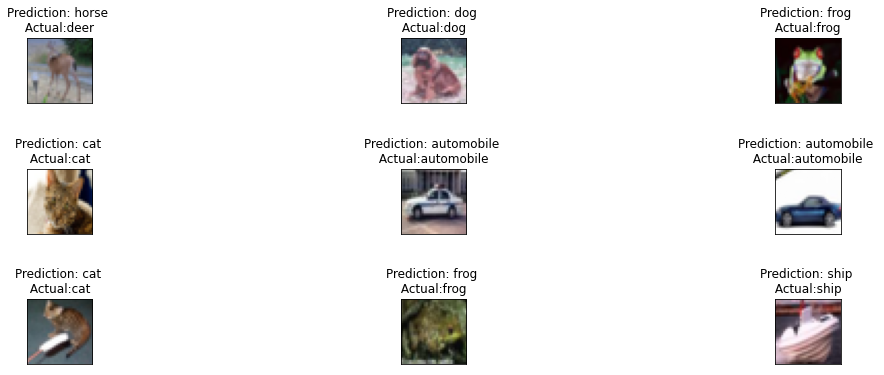

In [19]:
fig, axs = plt.subplots(3, 3, figsize = (19, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {} \n Actual:{} '.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  axs[i].imshow(img)

plt.show()